In [9]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('ds_salaries.csv',header='infer')
df.drop(df.columns[0], axis=1, inplace=True)
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


In [10]:
df.isnull().sum()

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


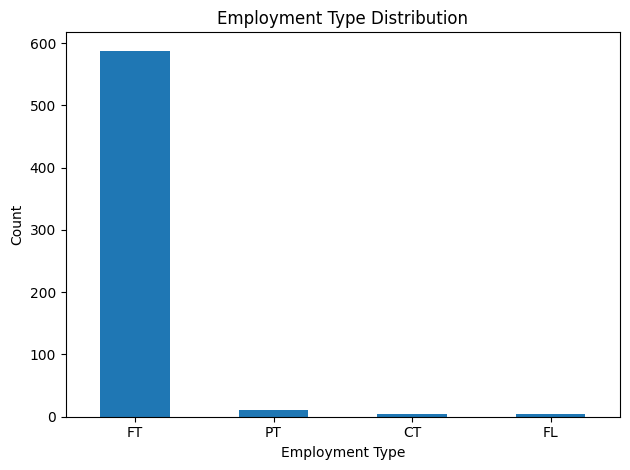

In [11]:
import matplotlib.pyplot as plt
df['employment_type'].value_counts().plot(kind='bar',width=0.5, title='Employment Type Distribution')
plt.xticks(rotation=0)
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

job_title
Data Scientist                143
Data Engineer                 132
Data Analyst                   97
Machine Learning Engineer      41
Research Scientist             16
Data Science Manager           12
Data Architect                 11
Machine Learning Scientist      8
Big Data Engineer               8
Director of Data Science        7
Name: count, dtype: int64
    experience_level employment_type                   job_title  salary  \
0                 MI              FT              Data Scientist   70000   
1                 SE              FT  Machine Learning Scientist  260000   
2                 SE              FT           Big Data Engineer   85000   
4                 SE              FT   Machine Learning Engineer  150000   
5                 EN              FT                Data Analyst   72000   
..               ...             ...                         ...     ...   
601               EN              FT                Data Analyst   52000   
602             

<ipython-input-12-a170c1557cfb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top.drop(df_top.columns[0], axis=1, inplace=True)


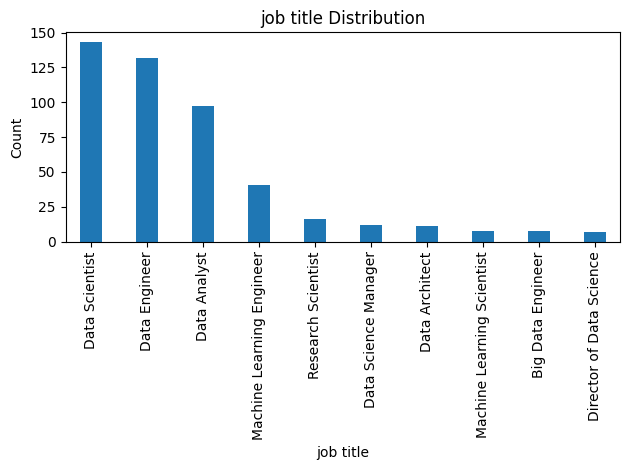

In [12]:
df['job_title'].value_counts().head(10).plot(kind='bar',width=0.4, title='job title Distribution')
print(df['job_title'].value_counts().head(10))
top_jobs = df['job_title'].value_counts().head(10).index.tolist()
df_top = df[df['job_title'].isin(top_jobs)]
df_top.drop(df_top.columns[0], axis=1, inplace=True)
print(df_top)

plt.xticks(rotation=90)
plt.xlabel('job title')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [13]:
print(df['job_title'].value_counts())
df_top['job_title'].value_counts()

job_title
Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Machine Learning Scientist                    8
Big Data Engineer                             8
Director of Data Science                      7
AI Scientist                                  7
Principal Data Scientist                      7
Data Science Consultant                       7
Data Analytics Manager                        7
BI Data Analyst                               6
Computer Vision Engineer                      6
ML Engineer                                   6
Lead Data Engineer                            6
Applied Data Scientist                        5
Business Data Analyst                         5
Data Engineering Manager      

,count
job_title,
Data Scientist,143
Data Engineer,132
Data Analyst,97
Machine Learning Engineer,41
Research Scientist,16
Data Science Manager,12
Data Architect,11
Machine Learning Scientist,8
Big Data Engineer,8


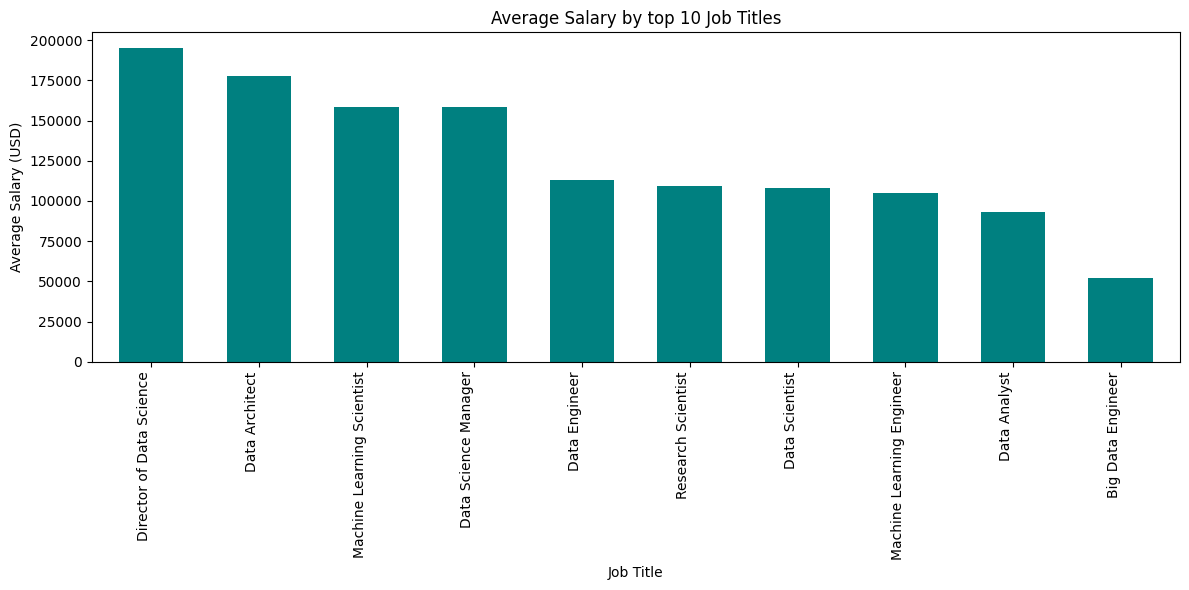

In [14]:
import matplotlib.pyplot as plt

# Define the desired job titles
selected_titles = [
    'Data Scientist', 'Data Engineer', 'Data Analyst',
    'Machine Learning Engineer', 'Research Scientist',
    'Data Science Manager', 'Data Architect',
    'Machine Learning Scientist', 'Big Data Engineer',
    'Director of Data Science'
]

# Filter the DataFrame
filtered_df = df[df['job_title'].isin(selected_titles)]

# Group by job title and calculate average salary
avg_salary_selected = (filtered_df.groupby('job_title')['salary_in_usd'].mean().loc[selected_titles].sort_values(ascending=False))

# Plot
avg_salary_selected.plot(kind='bar', figsize=(12, 6), title='Average Salary by top 10 Job Titles', color='teal', width=0.6)
plt.xlabel('Job Title')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()



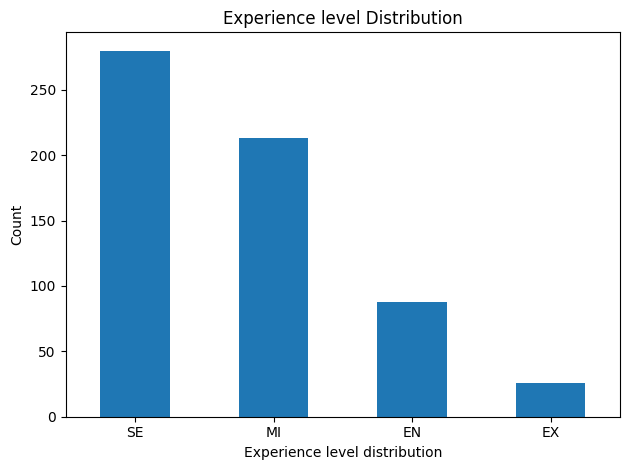

In [15]:
import matplotlib.pyplot as plt
df['experience_level'].value_counts().plot(kind='bar',width=0.5, title='Experience level Distribution')
plt.xticks(rotation=0)
plt.xlabel('Experience level distribution')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

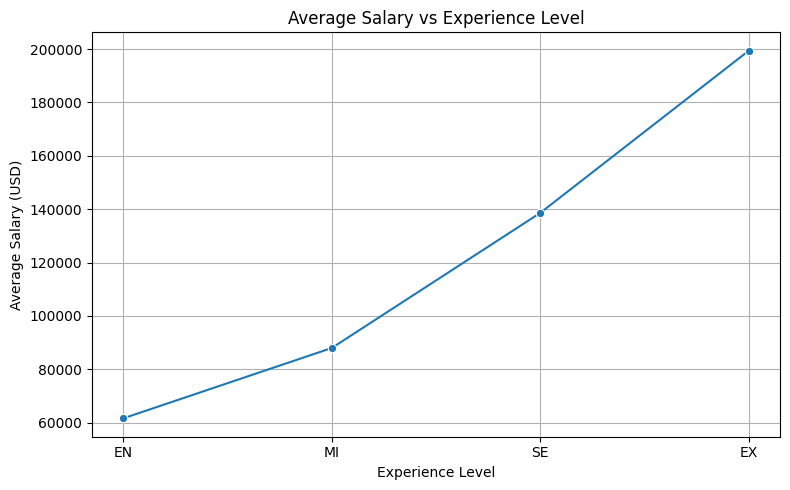

In [16]:
avg_salary_exp = df.groupby('experience_level')['salary_in_usd'].mean().reindex(['EN', 'MI', 'SE', 'EX'])

# Plot
plt.figure(figsize=(8, 5))
sns.lineplot(x=avg_salary_exp.index, y=avg_salary_exp.values, marker='o')
plt.title('Average Salary vs Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

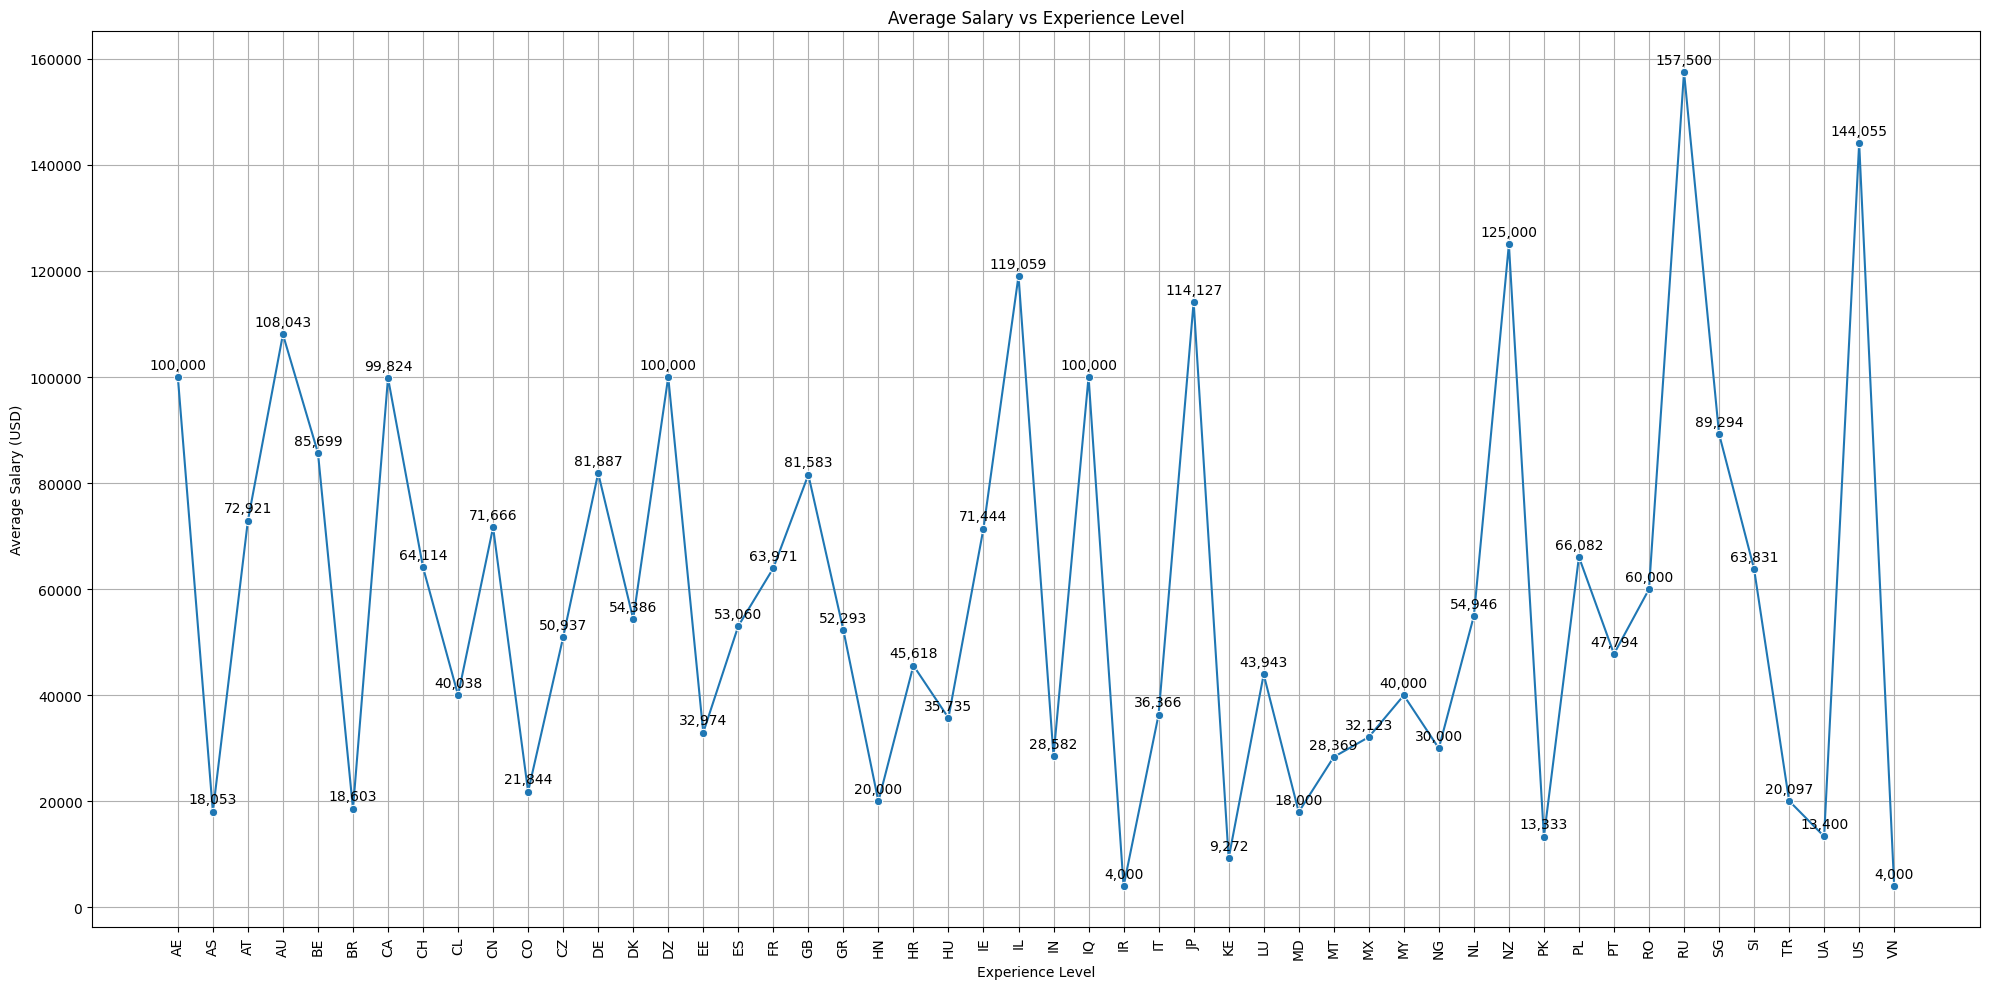

In [17]:
avg_salary_exp = df.groupby('company_location')['salary_in_usd'].mean()

# Plot
plt.figure(figsize=(20, 10))
ax=sns.lineplot(x=avg_salary_exp.index, y=avg_salary_exp.values, marker='o')
plt.title('Average Salary vs Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=90)
plt.grid(True)
for i, value in enumerate(avg_salary_exp.values):
    ax.text(i, value + 1000, f'{value:,.0f}', ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

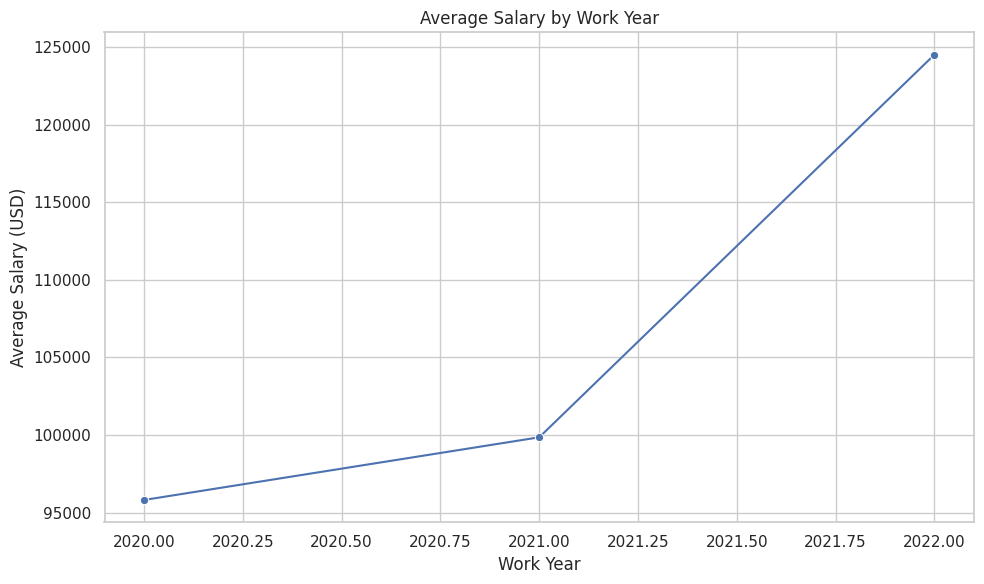

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Group by work year
avg_salary_by_year = df.groupby('work_year')['salary_in_usd'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_salary_by_year, x='work_year', y='salary_in_usd', marker='o')
plt.title('Average Salary by Work Year')
plt.xlabel('Work Year')
plt.ylabel('Average Salary (USD)')
plt.tight_layout()
plt.show()


<ipython-input-19-622f43245d7a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_salary_by_employment, x='employment_type', y='salary_in_usd', palette='Blues_d')


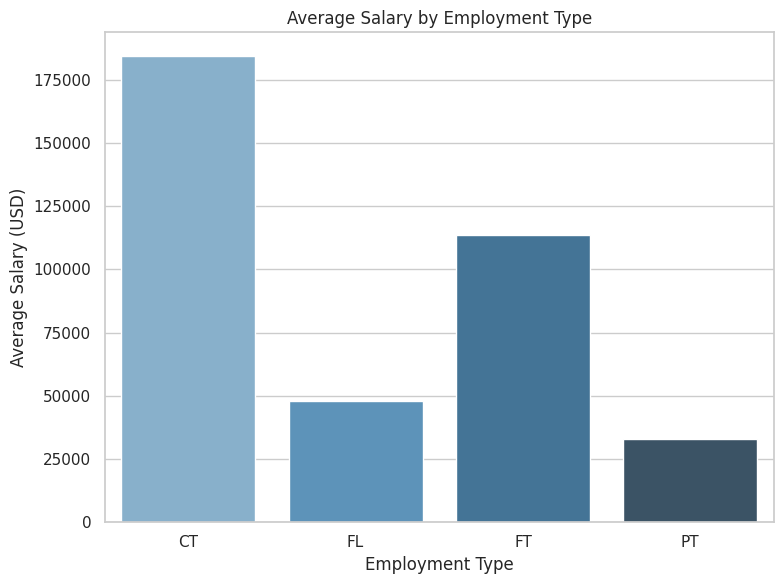

In [19]:
# Group by employment type
avg_salary_by_employment = df.groupby('employment_type')['salary_in_usd'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(data=avg_salary_by_employment, x='employment_type', y='salary_in_usd', palette='Blues_d')
plt.title('Average Salary by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Average Salary (USD)')
plt.tight_layout()
plt.show()


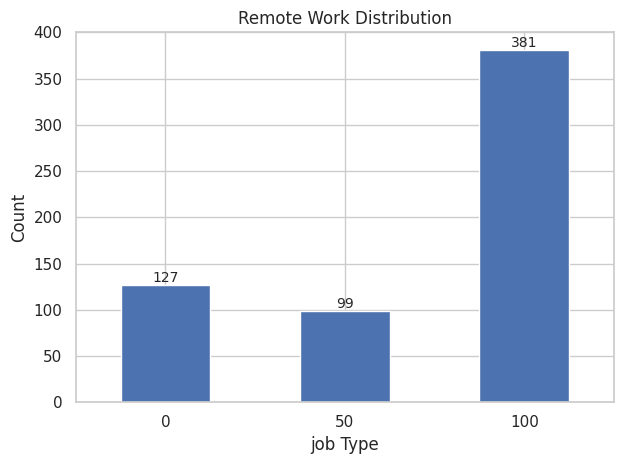

In [20]:
remote_counts = df['remote_ratio'].value_counts().reindex([0, 50, 100])

# Plotting
ax=remote_counts.plot(kind='bar', width=0.5, title='Remote Work Distribution')
plt.xticks(rotation=0)
plt.xlabel('job Type')
plt.ylabel('Count')
for i, value in enumerate(remote_counts.values):
    ax.text(i, value, f'{value:,.0f}', ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
# Drop unused columns
df_model = df.drop(columns=["salary", "salary_currency"])

# Encode categorical variables
label_encoders = {}
for col in df_model.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    label_encoders[col] = le

# Define features and target
X = df_model.drop(columns=["salary_in_usd"])
y = df_model["salary_in_usd"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.3f}")


Mean Squared Error: 4388751904.13
R^2 Score: 0.007


In [23]:
# Example input (adjust values as needed)
new_input = {
    'work_year': 2023,
    'experience_level': 'SE',
    'employment_type': 'FT',
    'job_title': 'Data Scientist',
    'employee_residence': 'US',
    'remote_ratio': 100,
    'company_location': 'US',
    'company_size': 'L'
}

# Encode categorical features using the saved label_encoders
encoded_input = {}
for key, value in new_input.items():
    if key in label_encoders:
        encoded_input[key] = label_encoders[key].transform([value])[0]
    else:
        encoded_input[key] = value

# Convert to DataFrame
import pandas as pd
input_df = pd.DataFrame([encoded_input])

# Predict salary
predicted_salary = model.predict(input_df)[0]
print(f"Predicted Salary in USD: ${predicted_salary:.2f}")


Predicted Salary in USD: $158200.00


In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("ds_salaries.csv")

# Drop unused columns
df_model = df.drop(columns=["Unnamed: 0", "salary", "salary_currency"])

# Encode categorical variables
label_encoders = {}
for col in df_model.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    label_encoders[col] = le

# Define features and target
X = df_model.drop(columns=["salary_in_usd"])
y = df_model["salary_in_usd"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Prediction function
def predict_salary_from_console():
    print("\nEnter the following details to predict salary in USD:")
    user_input = {}
    for col in X.columns:
        if col in label_encoders:
            categories = label_encoders[col].classes_
            print(f"{col} (Options: {', '.join(categories)}): ", end="")
            val = input().strip()
            while val not in categories:
                print(f"Invalid input. Please choose from: {', '.join(categories)}")
                val = input(f"{col}: ").strip()
            val = label_encoders[col].transform([val])[0]
        else:
            val = int(input(f"{col} (numeric): "))
        user_input[col] = val

    input_array = np.array(list(user_input.values())).reshape(1, -1)
    prediction = model.predict(input_array)[0]
    print(f"\nPredicted Salary in USD: ${round(prediction, 2)}")

# Run the prediction
predict_salary_from_console()



Enter the following details to predict salary in USD:
work_year (numeric): 2023
experience_level (Options: EN, EX, MI, SE): SE
employment_type (Options: CT, FL, FT, PT): FT
job_title (Options: 3D Computer Vision Researcher, AI Scientist, Analytics Engineer, Applied Data Scientist, Applied Machine Learning Scientist, BI Data Analyst, Big Data Architect, Big Data Engineer, Business Data Analyst, Cloud Data Engineer, Computer Vision Engineer, Computer Vision Software Engineer, Data Analyst, Data Analytics Engineer, Data Analytics Lead, Data Analytics Manager, Data Architect, Data Engineer, Data Engineering Manager, Data Science Consultant, Data Science Engineer, Data Science Manager, Data Scientist, Data Specialist, Director of Data Engineering, Director of Data Science, ETL Developer, Finance Data Analyst, Financial Data Analyst, Head of Data, Head of Data Science, Head of Machine Learning, Lead Data Analyst, Lead Data Engineer, Lead Data Scientist, Lead Machine Learning Engineer, ML En

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [25]:
import seaborn as sns
sns.set(style='whitegrid')
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

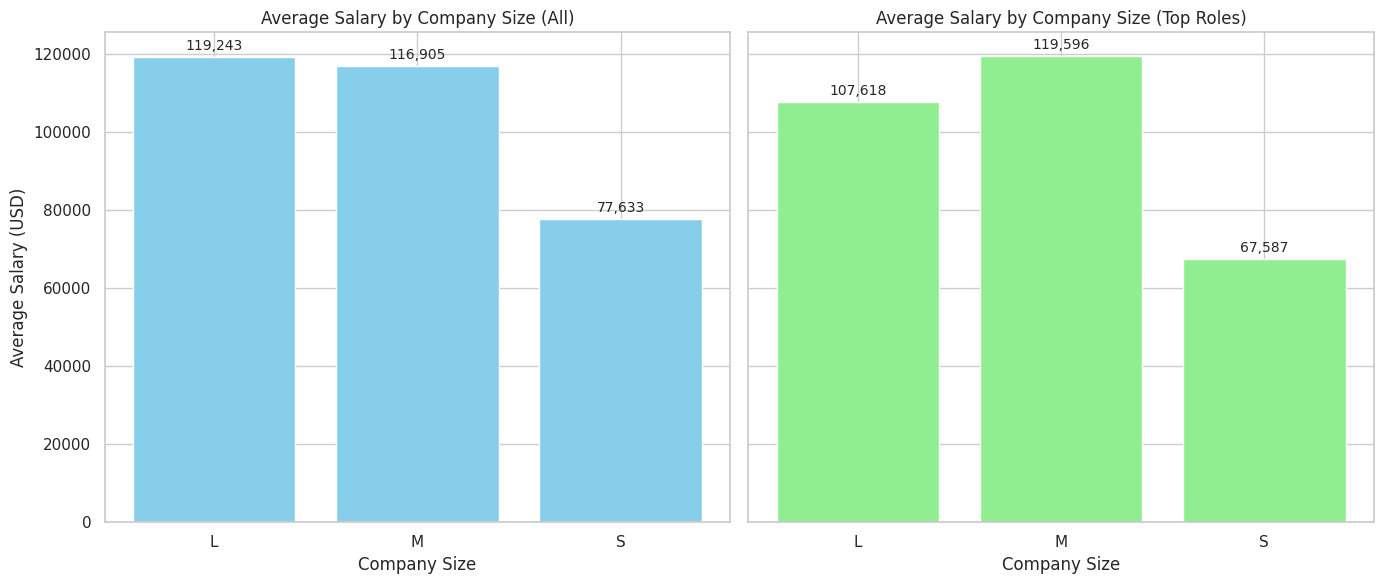

In [26]:
import matplotlib.pyplot as plt

# Prepare data
avg_salary_by_company_size = df.groupby('company_size')['salary_in_usd'].mean()
avg_salary_by_company_size_top = df_top.groupby('company_size')['salary_in_usd'].mean()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot 1: All Data
axes[0].bar(avg_salary_by_company_size.index, avg_salary_by_company_size.values, color='skyblue')
axes[0].set_title('Average Salary by Company Size (All)')
axes[0].set_xlabel('Company Size')
axes[0].set_ylabel('Average Salary (USD)')
axes[0].tick_params(axis='x', rotation=0)
for i, value in enumerate(avg_salary_by_company_size.values):
    axes[0].text(i, value + 1000, f'{value:,.0f}', ha='center', va='bottom', fontsize=10)

# Plot 2: Top Job Titles Only
axes[1].bar(avg_salary_by_company_size_top.index, avg_salary_by_company_size_top.values, color='lightgreen')
axes[1].set_title('Average Salary by Company Size (Top Roles)')
axes[1].set_xlabel('Company Size')
axes[1].tick_params(axis='x', rotation=0)
for i, value in enumerate(avg_salary_by_company_size_top.values):
    axes[1].text(i, value + 1000, f'{value:,.0f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


In [27]:
from scipy import stats
groups = [group['salary_in_usd'].values for name, group in df_top.groupby('job_title')]
f_stat, p_val = stats.f_oneway(*groups)

print(f"\nANOVA Test Result:")
print(f"F-statistic: {f_stat:.2f}")
print(f"P-value: {p_val:.2e}")

if p_val < 0.05:
    print("Conclusion: Significant difference in salaries across job titles.")
else:
    print("Conclusion: No significant difference in salaries across job titles.")


ANOVA Test Result:
F-statistic: 6.59
P-value: 7.14e-09
Conclusion: Significant difference in salaries across job titles.


In [28]:
from scipy.stats import ttest_1samp

# Filter the data for the two job titles
job1 = 'Data Scientist'
job2 = 'Data Engineer'

salary_job1 = df_top[df_top['job_title'] == job1]['salary_in_usd']
salary_job2 = df_top[df_top['job_title'] == job2]['salary_in_usd']
average1 = sum(salary_job1) / len(salary_job1)
average2 = sum(salary_job2) / len(salary_job2)
print(average1)
print(average2)
difference=average2-average1
print(difference)
hypothesized_mean = 100000
for job in df_top['job_title'].unique():# Perform independent two-sample t-test
  salary_job = df[df['job_title'] == job]['salary_in_usd']
  t_stat, p_value = ttest_1samp(salary_job, popmean=hypothesized_mean)  # Welch's t-test (no assumption of equal variance)
  print(f"  Job Title: {job}")
  print(f"  T-statistic: {t_stat:.4f}")
  print(f"   P-value: {p_value:.4f}")
# Interpretation
  if p_value < 0.05:
    print(f"There is a statistically significant difference in average salaries between {salary_job} and hypothesized mean.")
  else:
    print(f"There is no statistically significant difference in average salaries between {salary_job} and hypothesized mean.")


108187.83216783217
112725.0
4537.167832167834
  Job Title: Data Scientist
  T-statistic: 1.5272
   P-value: 0.1289
There is no statistically significant difference in average salaries between 0       79833
7       35735
10      51321
11      40481
12      39916
        ...  
592    230000
593    150000
596    210000
598    160000
599    130000
Name: salary_in_usd, Length: 143, dtype: int64 and hypothesized mean.
  Job Title: Machine Learning Scientist
  T-statistic: 2.0778
   P-value: 0.0763
There is no statistically significant difference in average salaries between 1      260000
115    225000
126    120000
184     12000
224    225000
419    160000
420    112300
495    153000
Name: salary_in_usd, dtype: int64 and hypothesized mean.
  Job Title: Big Data Engineer
  T-statistic: -3.1624
   P-value: 0.0159
There is a statistically significant difference in average salaries between 2      109024
17     114047
31      70000
120     60000
180     22611
192     18000
213      5882
230     16

In [29]:
print(df.loc[:,"work_year"].unique())
print(df.loc[:,'experience_level'].str.lower().unique())
print(df.loc[:,'employment_type'].str.lower().unique())
print(df.loc[:,'job_title'].str.lower().unique())
print(df.loc[:,'employee_residence'].str.lower().unique())
print(df.loc[:,'company_location'].str.lower().unique())

[2020 2021 2022]
['mi' 'se' 'en' 'ex']
['ft' 'ct' 'pt' 'fl']
['data scientist' 'machine learning scientist' 'big data engineer'
 'product data analyst' 'machine learning engineer' 'data analyst'
 'lead data scientist' 'business data analyst' 'lead data engineer'
 'lead data analyst' 'data engineer' 'data science consultant'
 'bi data analyst' 'director of data science' 'research scientist'
 'machine learning manager' 'data engineering manager'
 'machine learning infrastructure engineer' 'ml engineer' 'ai scientist'
 'computer vision engineer' 'principal data scientist'
 'data science manager' 'head of data' '3d computer vision researcher'
 'data analytics engineer' 'applied data scientist'
 'marketing data analyst' 'cloud data engineer' 'financial data analyst'
 'computer vision software engineer' 'director of data engineering'
 'data science engineer' 'principal data engineer'
 'machine learning developer' 'applied machine learning scientist'
 'data analytics manager' 'head of data sc

In [30]:
from statsmodels.stats.weightstats import ztest

# Filter salary data for two job titles
job1 = 'Data Scientist'
job2 = 'Data Engineer'

salary_job1 = df[df['job_title'] == job1]['salary_in_usd']
salary_job2 = df[df['job_title'] == job2]['salary_in_usd']

# Perform two-sample Z-test
z_stat, p_value = ztest(salary_job1, salary_job2)

# Print results
print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print(f"There is a statistically significant difference in average salaries between {job1} and {job2}.")
else:
    print(f"There is no statistically significant difference in average salaries between {job1} and {job2}.")


Z-statistic: -0.6153
P-value: 0.5383
There is no statistically significant difference in average salaries between Data Scientist and Data Engineer.


       experience_level employment_type company_size company_location  \
count               607             607          607              607   
unique                4               4            3               50   
top                  SE              FT            M               US   
freq                280             588          326              355   
mean                NaN             NaN          NaN              NaN   
std                 NaN             NaN          NaN              NaN   
min                 NaN             NaN          NaN              NaN   
25%                 NaN             NaN          NaN              NaN   
50%                 NaN             NaN          NaN              NaN   
75%                 NaN             NaN          NaN              NaN   
max                 NaN             NaN          NaN              NaN   

        salary_in_usd  
count      607.000000  
unique            NaN  
top               NaN  
freq              NaN  
mea

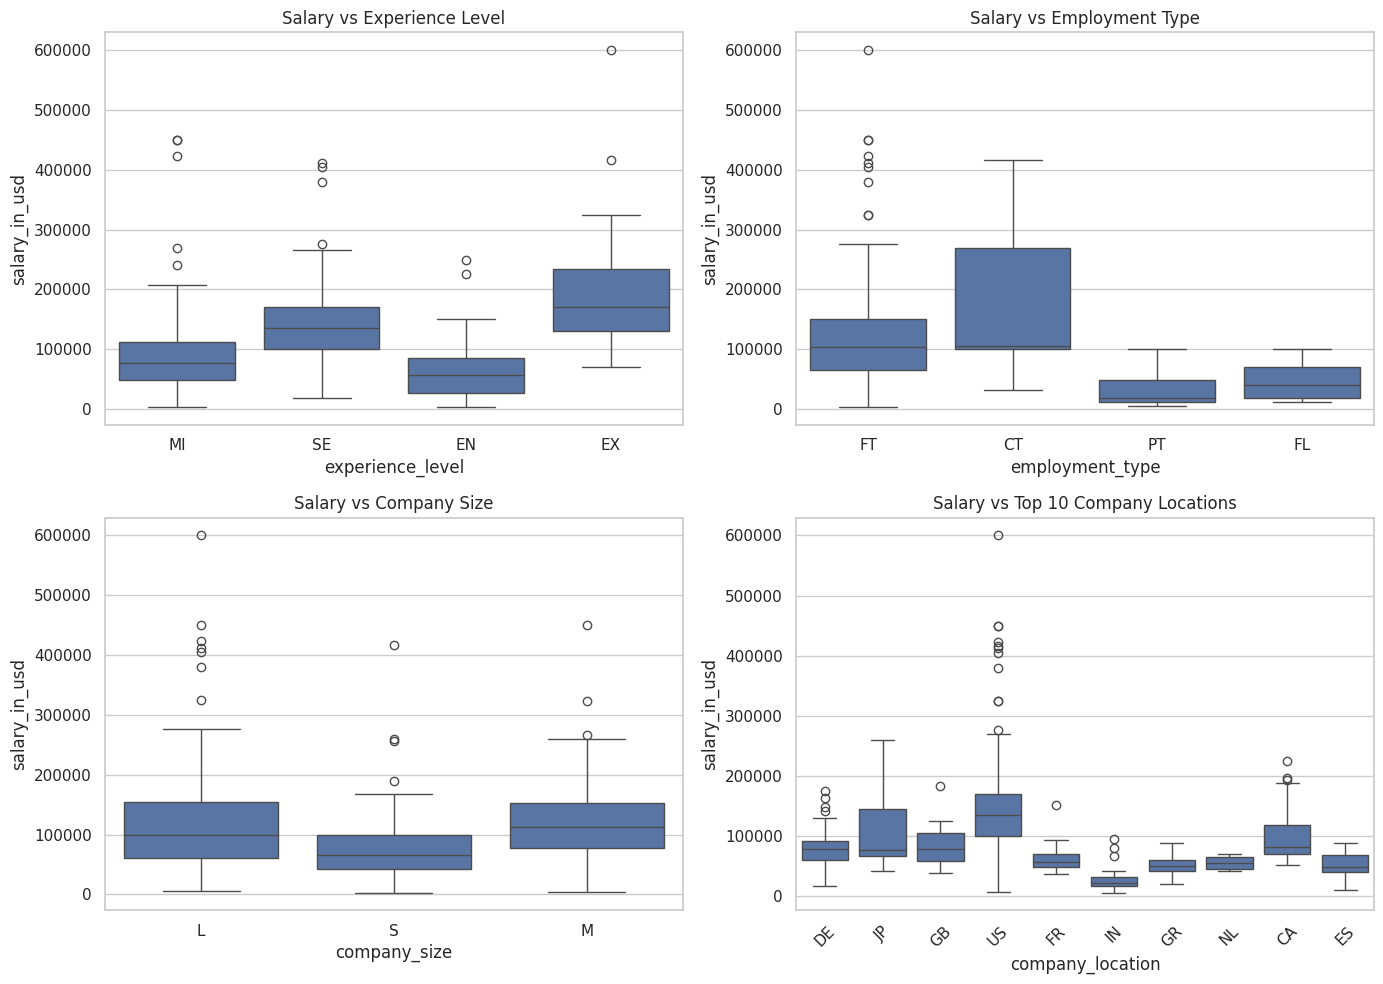

                            OLS Regression Results                            
Dep. Variable:          salary_in_usd   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     7.834
Date:                Sat, 17 May 2025   Prob (F-statistic):           2.50e-65
Time:                        03:18:59   Log-Likelihood:                -7259.9
No. Observations:                 607   AIC:                         1.482e+04
Df Residuals:                     459   BIC:                         1.547e+04
Df Model:                         147                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

# Load the dataset
df = pd.read_csv("ds_salaries.csv")

# Drop unnecessary column
df = df.drop(columns=['Unnamed: 0'], errors='ignore')

# Display basic info
print(df[['experience_level', 'employment_type', 'company_size', 'company_location', 'salary_in_usd']].describe(include='all'))

# Bivariate Analysis: Boxplots
plt.figure(figsize=(14, 10))

# Experience Level vs Salary
plt.subplot(2, 2, 1)
sns.boxplot(data=df, x='experience_level', y='salary_in_usd')
plt.title("Salary vs Experience Level")

# Employment Type vs Salary
plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='employment_type', y='salary_in_usd')
plt.title("Salary vs Employment Type")

# Company Size vs Salary
plt.subplot(2, 2, 3)
sns.boxplot(data=df, x='company_size', y='salary_in_usd')
plt.title("Salary vs Company Size")

# Company Location (Top 10) vs Salary
top_locations = df['company_location'].value_counts().head(10).index
df_top_loc = df[df['company_location'].isin(top_locations)]

plt.subplot(2, 2, 4)
sns.boxplot(data=df_top_loc, x='company_location', y='salary_in_usd')
plt.title("Salary vs Top 10 Company Locations")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=['experience_level', 'employment_type', 'company_size', 'company_location'], drop_first=True)

# Build regression model
formula = 'salary_in_usd ~ ' + ' + '.join([col for col in df_encoded.columns if col != 'salary_in_usd'])
model = smf.ols(formula=formula, data=df_encoded).fit()

# Print regression summary
print(model.summary())


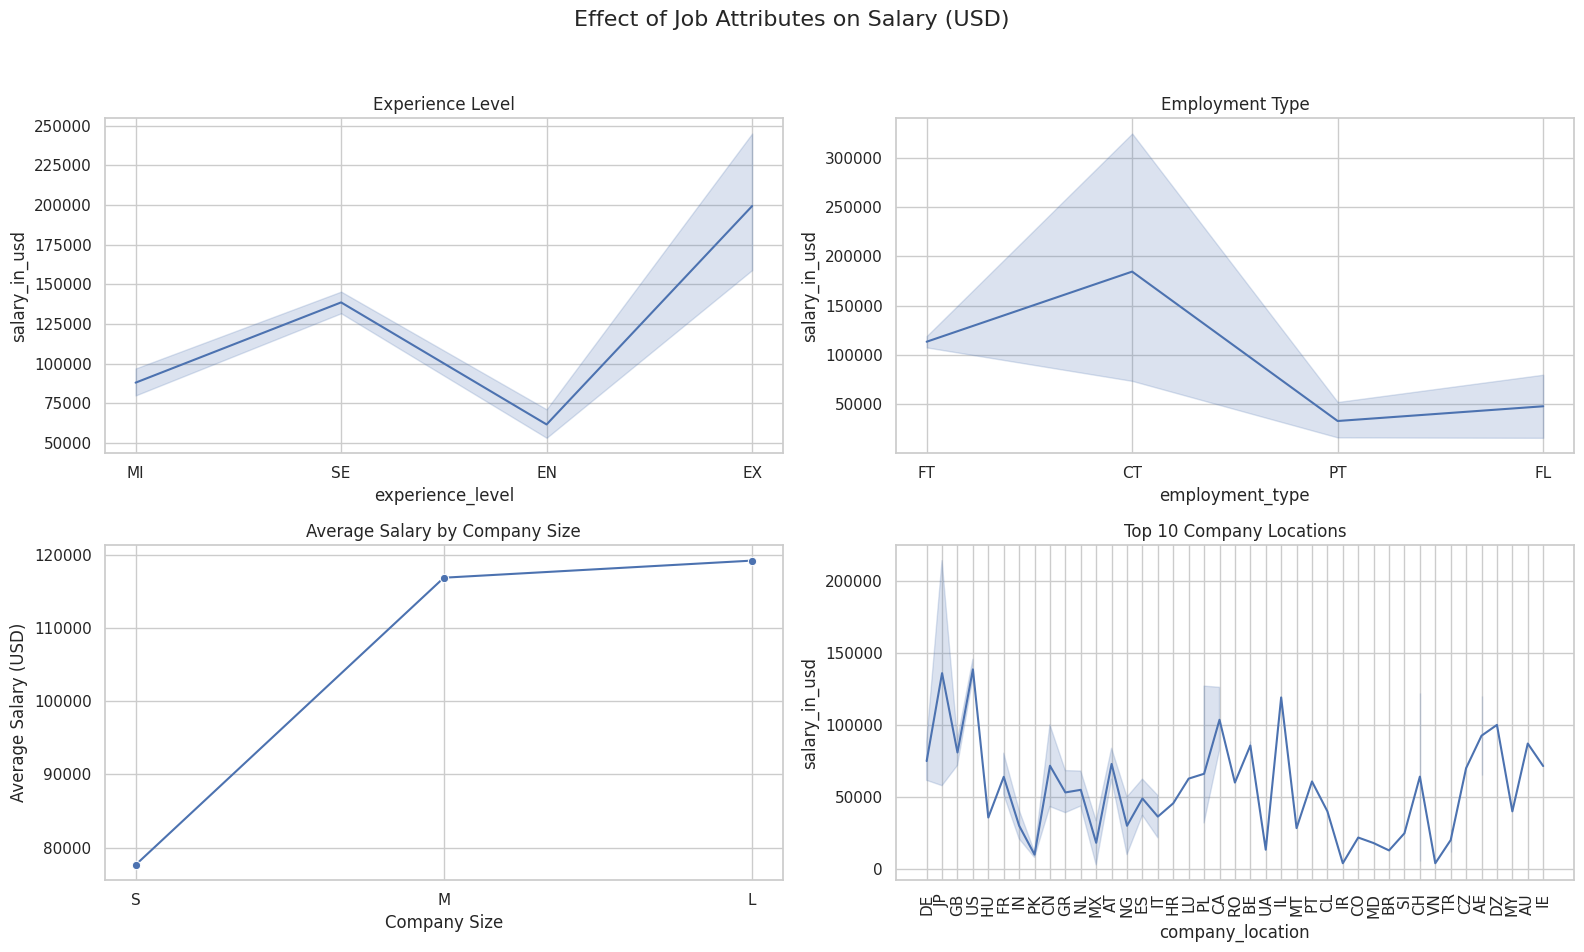

In [32]:
import numpy as np

# Prepare figure
fig, axs = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Effect of Job Attributes on Salary (USD)', fontsize=16)

# Plot 1: Experience Level vs Salary
sns.lineplot(data=df, x='experience_level', y='salary_in_usd', ax=axs[0, 0])
axs[0, 0].set_title('Experience Level')

# Plot 2: Employment Type vs Salary
sns.lineplot(data=df, x='employment_type', y='salary_in_usd', ax=axs[0, 1])
axs[0, 1].set_title('Employment Type')

# Plot 3: Company Size vs Salary
# Aggregate mean salary by company size
avg_salary_by_size = df.groupby('company_size')['salary_in_usd'].mean().reindex(['S', 'M', 'L'])

# Plot the lineplot
sns.lineplot(x=avg_salary_by_size.index, y=avg_salary_by_size.values, marker='o', ax=axs[1, 0])
axs[1, 0].set_title('Average Salary by Company Size')
axs[1, 0].set_xlabel('Company Size')
axs[1, 0].set_ylabel('Average Salary (USD)')

# Plot 4: Top 10 Company Locations vs Salary
sns.lineplot(data=filtered_df, x='company_location', y='salary_in_usd', ax=axs[1, 1])
axs[1, 1].set_title('Top 10 Company Locations')
axs[1, 1].tick_params(axis='x', rotation=90)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


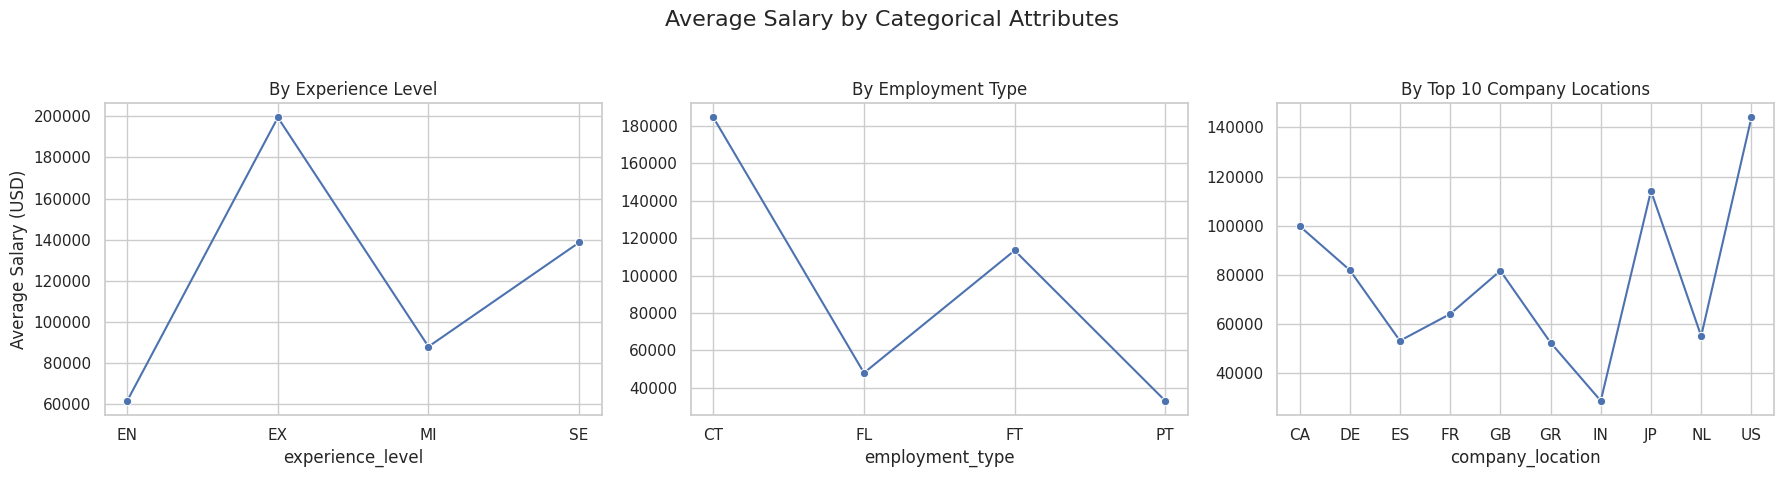

In [33]:
# Average salary by experience level
avg_salary_experience = df.groupby('experience_level')['salary_in_usd'].mean()

# Average salary by employment type
avg_salary_employment = df.groupby('employment_type')['salary_in_usd'].mean()

top_10_locations = df['company_location'].value_counts().nlargest(10).index
avg_salary_location = df[df['company_location'].isin(top_10_locations)].groupby('company_location')['salary_in_usd'].mean()

# Plot all three line plots in one figure
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Average Salary by Categorical Attributes', fontsize=16)
# Plot 1: Experience Level
sns.lineplot(x=avg_salary_experience.index, y=avg_salary_experience.values, marker='o', ax=axs[0])
axs[0].set_title('By Experience Level')
axs[0].set_ylabel('Average Salary (USD)')

# Plot 2: Employment Type
sns.lineplot(x=avg_salary_employment.index, y=avg_salary_employment.values, marker='o', ax=axs[1])
axs[1].set_title('By Employment Type')

# Plot 3: Company Location (Top 10)
sns.lineplot(x=avg_salary_location.index, y=avg_salary_location.values, marker='o', ax=axs[2])
axs[2].set_title('By Top 10 Company Locations')
axs[2].tick_params(axis='x', rotation=0)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()